# Opus 13001
## The song of a lonely buoy
### By Electronick

The objective is to create music out of a buoy parameters.

The objective is to experiment with different forms of quantize data to make it into music.

This notebook uses:
1. NOAA National Data Buoy Center (NDBC) api, with the python library [NDBC-api](https://pypi.org/project/ndbc-api/)
2. Reaper music software to get the midi and play it with
3. [BBC's Symphony Orchestra Discover VST](https://www.spitfireaudio.com/bbc-symphony-orchestra-discover#overview)

### Step # 1: from data to music?

How to transform data into music that makes sense?
I' m not sure, but let's figure it out together

What is the basis of music?
with the help of claude 3.5, we get the following:

The fundamental elements of music include:

1. Pitch: The highness or lowness of a sound, represented by notes.

2. Rhythm: The pattern of regular or irregular pulses in music, including:
   - Beat: The steady pulse in music
   - Tempo: The speed of the beat
   - Meter: The organization of beats into regular groupings

3. Melody: A sequence of notes that form a recognizable tune.

4. Harmony: The combination of simultaneously sounded notes to create chords and chord progressions.

5. Timbre: The quality or color of a sound that distinguishes different voices or instruments.

6. Dynamics: The variation in loudness or softness of sound.

7. Texture: The way different musical elements are combined and interrelated.

8. Form: The overall structure or organization of a musical piece.

9. Scales: Sequences of notes in a specific pattern, such as major, minor, pentatonic, etc.

10. Intervals: The distance between two pitches.

11. Key: The central note or chord that a piece of music is built around.

12. Time signatures: Indications of the number of beats in each measure and which note value represents one beat.

13. Articulation: The way individual notes are played or sung (e.g., staccato, legato).

14. Tonality: The system of relationships between different pitches, often centered around a tonic or home note.

15. Modulation: The process of changing from one key to another within a piece of music.

These elements combine to create the complex and diverse world of music across various genres and styles.

### Test # 1
Sure sure... but let's start with the basic.

we can normalize data into 2 octaves (to make it more interesting, i guess.)
We can play with the scale of C Mayor, as is the most straightforwards in terms of musical notes.
plug that into midi, and into reaper, and see what happens!

In [15]:
%pip install ndbc-api
%pip install mido python-rtmidi

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [16]:
from ndbc_api import NdbcApi

import mido
import time

import pandas as pd
import matplotlib.pyplot as plt

api = NdbcApi()

Get data from buoy 13001 and remove the columns with nulls

In [17]:
df = api.get_data(
    station_id='13001',
    mode='stdmet',
    start_time='2023-09-01',
    end_time='2024-09-02',
)
# Removing columns where all values are NaN
df = df.dropna(axis=1, how='all')

df

,WDIR,WSPD,GST,PRES,ATMP,WTMP
timestamp,,,,,,
2024-07-22 00:00:00,255,4.1,4.8,1013.7,27.5,27.5
2024-07-22 01:00:00,266,5.4,6.2,1013.4,27.3,27.5
2024-07-22 02:00:00,255,6.3,7.6,1012.9,27.3,27.4
2024-07-22 03:00:00,267,5.0,5.7,1012.2,27.1,27.4
2024-07-22 04:00:00,258,5.1,6.2,1011.7,27.2,27.4
...,...,...,...,...,...,...
2024-09-01 20:00:00,244,4.3,5.0,1011.4,27.8,28.3
2024-09-01 21:00:00,254,4.1,4.9,1012.3,27.9,28.2
2024-09-01 22:00:00,255,3.6,4.5,1013.1,28.0,28.3


Let's plot WTMP (water temperature)

In [18]:
min_wtmp = df['WTMP'].min()
max_wtmp = df['WTMP'].max()

print("Min wtmp:", min_wtmp)
print("Max wtmp:", max_wtmp)

# Normalize to range 0-1
df['music_wtmp'] = (df['WTMP'] - min_wtmp) / (max_wtmp - min_wtmp)

# Scale to range 0-13, being 2 octaves
df['music_wtmp'] = df['music_wtmp'] * 14

# Round to nearest integer
df['music_wtmp'] = df['music_wtmp'].round().astype(int)

# Display the DataFrame
print(df[['WTMP', 'music_wtmp']])



Min wtmp: 27.4
Max wtmp: 29.6
                     WTMP  music_wtmp
timestamp                            
2024-07-22 00:00:00  27.5           1
2024-07-22 01:00:00  27.5           1
2024-07-22 02:00:00  27.4           0
2024-07-22 03:00:00  27.4           0
2024-07-22 04:00:00  27.4           0
...                   ...         ...
2024-09-01 20:00:00  28.3           6
2024-09-01 21:00:00  28.2           5
2024-09-01 22:00:00  28.3           6
2024-09-01 23:00:00  28.3           6
2024-09-02 00:00:00  28.3           6

[1009 rows x 2 columns]


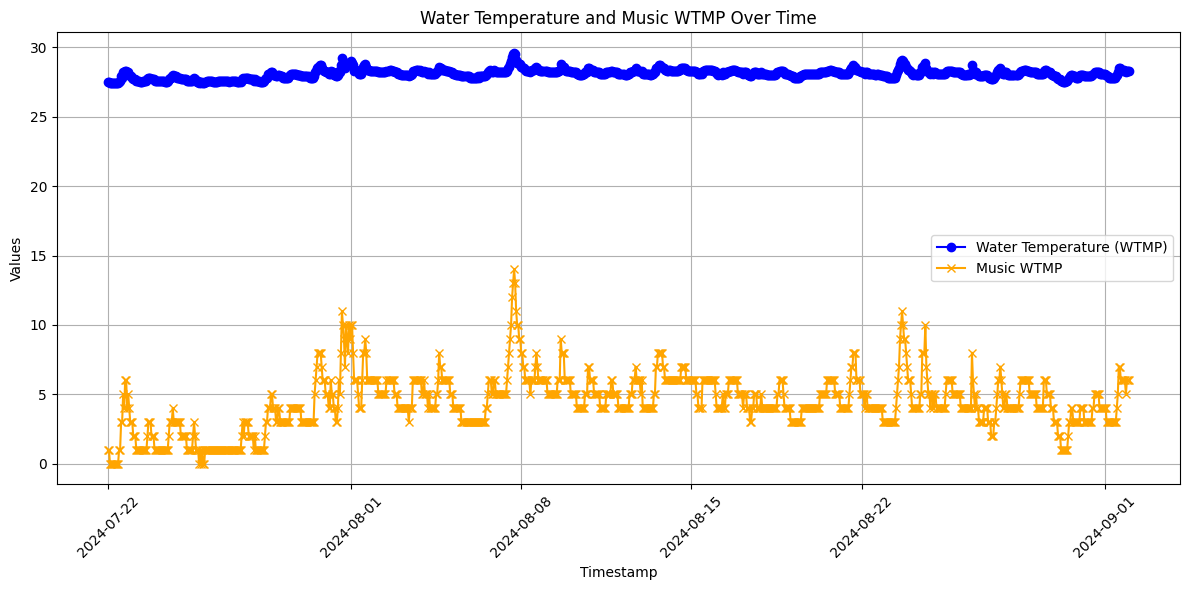

In [19]:
# Plotting the data
plt.figure(figsize=(12, 6))

# Plot WTMP
plt.plot(df.index, df['WTMP'], label='Water Temperature (WTMP)', color='blue', marker='o')

# Plot music_wtmp
plt.plot(df.index, df['music_wtmp'], label='Music WTMP', color='orange', marker='x')

# Adding titles and labels
plt.title('Water Temperature and Music WTMP Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

Configure the midi virtual port. I used loopmidi in windows, and created a midi virtual channel called Python2Reaper
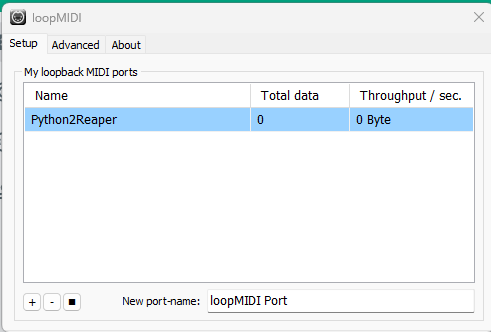

In [20]:
print("Output ports:", mido.get_output_names())
print("Input ports:", mido.get_input_names())

Output ports: ['Microsoft GS Wavetable Synth 0', 'Python2Reaper 1']
Input ports: ['Python2Reaper 0']


In [21]:
# Define the MIDI port (you may need to adjust this)
port_name = 'Python2Reaper 1'

# Create a MIDI output
outport = mido.open_output(port_name)

In [22]:

# Define the duration of each note (in seconds)
duration = 0.3

for index, row in df.iloc[:10].iterrows():
    print(f"Index: {index}, note:: {row['music_wtmp']}")
    note = int(row['music_wtmp']) + 60
    
    # Note On message
    msg_on = mido.Message('note_on', note=note, velocity=64, channel=0)
    outport.send(msg_on)
    
    msg_on = mido.Message('note_on', note=note+5, velocity=64, channel=1)
    outport.send(msg_on)
    
    # Wait for the duration
    time.sleep(duration)
    
    # Note Off message
    msg_off = mido.Message('note_off', note=note, velocity=64, channel=0)
    outport.send(msg_off)
    
    msg_off = mido.Message('note_off', note=note+5, velocity=64, channel=1)
    outport.send(msg_off)

Index: 2024-07-22 00:00:00, note:: 1.0
Index: 2024-07-22 01:00:00, note:: 1.0
Index: 2024-07-22 02:00:00, note:: 0.0
Index: 2024-07-22 03:00:00, note:: 0.0
Index: 2024-07-22 04:00:00, note:: 0.0
Index: 2024-07-22 05:00:00, note:: 0.0
Index: 2024-07-22 06:00:00, note:: 0.0
Index: 2024-07-22 07:00:00, note:: 0.0
Index: 2024-07-22 08:00:00, note:: 0.0
Index: 2024-07-22 09:00:00, note:: 0.0


Ok it works, now make it more musical, using real scales, or modes
- Ionian
- Dorian
- Phrygian 
- lydian
- etc..

In [23]:
def get_midi_notes(mode='Ionian', midi_base=60, octaves=2):
    # Define the intervals for each mode
    modes = {
        'Ionian': [0, 2, 4, 5, 7, 9, 11],
        'Dorian': [0, 2, 3, 5, 7, 9, 10],
        'Phrygian': [0, 1, 3, 5, 7, 8, 10],
        'Lydian': [0, 2, 4, 6, 7, 9, 11],
        'Mixolydian': [0, 2, 4, 5, 7, 9, 10],
        'Aeolian': [0, 2, 3, 5, 7, 8, 10],
        'Locrian': [0, 1, 3, 5, 6, 8, 10]
    }

    # Get the intervals for the specified mode
    intervals = modes.get(mode)
    
    if intervals is None:
        raise ValueError(f"Mode '{mode}' is not recognized.")
    # Create note mapping based on the input key and octave
    notes_midi = []
    for octave in range(octaves):
        notes_midi.extend([midi_base + interval + (octave * 12) for interval in intervals])

    return notes_midi

#get_midi_notes()

In [24]:
import pandas as pd
# Function to map a DataFrame column to MIDI notes
def map_to_midi(df_column, mode='Ionian', midi_base=60, octaves=2):
    midi_notes = get_midi_notes(mode, midi_base, octaves)
    # Map values from 1-14 to MIDI notes
    midi_mapped = df_column.apply(lambda x: midi_notes[x] if 0 <= x < 14 else None)

    return midi_mapped

# Sample DataFrame
# df = pd.DataFrame({'notes': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 0, 13, 0]})

# # Mapping the 'notes' column to MIDI notes and creating a new column
# df['midi_notes'] = map_to_midi(df['notes'])

# # Display the modified DataFrame
# print(df)


In [25]:
key_input = 'C4'
mode_input = 'Locrian'
# get_midi_notes(key_input,mode_input)

df['music_midi'] = map_to_midi(df['music_wtmp'],mode=mode_input)


Lets hear the music

In [26]:
# Define the duration of each note (in seconds)
duration = 0.1

for index, row in df.iloc[:10].iterrows():
    print(f"Index: {index}, note:: {row['music_midi']}")
    note = int(row['music_midi'])
    
    # Note On message
    msg_on = mido.Message('note_on', note=note, velocity=64, channel=0)
    outport.send(msg_on)
    
    msg_on = mido.Message('note_on', note=note+8, velocity=64, channel=1)
    outport.send(msg_on)
    
    # Wait for the duration
    time.sleep(duration)
    
    # Note Off message
    msg_off = mido.Message('note_off', note=note, velocity=64, channel=0)
    outport.send(msg_off)
    
    msg_off = mido.Message('note_off', note=note+8, velocity=64, channel=1)
    outport.send(msg_off)

Index: 2024-07-22 00:00:00, note:: 61.0
Index: 2024-07-22 01:00:00, note:: 61.0
Index: 2024-07-22 02:00:00, note:: 60.0
Index: 2024-07-22 03:00:00, note:: 60.0
Index: 2024-07-22 04:00:00, note:: 60.0
Index: 2024-07-22 05:00:00, note:: 60.0
Index: 2024-07-22 06:00:00, note:: 60.0
Index: 2024-07-22 07:00:00, note:: 60.0
Index: 2024-07-22 08:00:00, note:: 60.0
Index: 2024-07-22 09:00:00, note:: 60.0


In [27]:
%pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [28]:
import ipywidgets as widgets
from IPython.display import display

# Widgets
mode_dropdown = widgets.Dropdown(
    options=['Ionian', 'Dorian', 'Phrygian', 'Lydian', 'Mixolydian', 'Aeolian', 'Locrian'],
    description='Mode:',
    value='Dorian'
)

key_text = widgets.Text(
    description='Initial Key:',
    value='C4'
)

data_amount_slider = widgets.IntSlider(
    value=50,
    min=1,
    max=len(df),
    description='Data to Process:',
    continuous_update=False
)

duration_slider = widgets.FloatSlider(
    value=0.1,
    min=0.1,
    max=1.0,
    step=0.1,
    description='Duration (s):'
)

run_button = widgets.Button(
    description='Run MIDI Sequence'
)

# Function to run when the button is pressed
def run_midi_sequence(b):
    duration = duration_slider.value
    data_amount = data_amount_slider.value
    mode = mode_dropdown.value
    key = key_text.value

    # Example output (this is where the MIDI message code goes)
    print(f"Running MIDI Sequence with Key: {key}, Mode: {mode}, Duration: {duration}, Data Amount: {data_amount}")
    
    df['music_midi'] = map_to_midi(df['music_wtmp'],mode=mode)
    
    for index, row in df.iloc[:data_amount].iterrows():
        note = int(row['music_midi'])
        print(f"Index: {index}, note: {note}")
        
        # Note On messages
        msg_on = mido.Message('note_on', note=note, velocity=64, channel=0)
        outport.send(msg_on)
        
        msg_on = mido.Message('note_on', note=note + 8, velocity=64, channel=1)
        outport.send(msg_on)
        
        # Wait for the duration
        time.sleep(duration)
        
        # Note Off messages
        msg_off = mido.Message('note_off', note=note, velocity=64, channel=0)
        outport.send(msg_off)
        
        msg_off = mido.Message('note_off', note=note + 8, velocity=64, channel=1)
        outport.send(msg_off)

# Bind the button to the function
run_button.on_click(run_midi_sequence)

# Display the widgets
display(mode_dropdown, key_text, data_amount_slider, duration_slider, run_button)


Dropdown(description='Mode:', index=1, options=('Ionian', 'Dorian', 'Phrygian', 'Lydian', 'Mixolydian', 'Aeoli…

Text(value='C4', description='Initial Key:')

IntSlider(value=50, continuous_update=False, description='Data to Process:', max=1009, min=1)

FloatSlider(value=0.1, description='Duration (s):', max=1.0, min=0.1)

Button(description='Run MIDI Sequence', style=ButtonStyle())

Running MIDI Sequence with Key: C4, Mode: Ionian, Duration: 0.1, Data Amount: 99
Index: 2024-07-22 00:00:00, note: 62
Index: 2024-07-22 01:00:00, note: 62
Index: 2024-07-22 02:00:00, note: 60
Index: 2024-07-22 03:00:00, note: 60
Index: 2024-07-22 04:00:00, note: 60
Index: 2024-07-22 05:00:00, note: 60
Index: 2024-07-22 06:00:00, note: 60
Index: 2024-07-22 07:00:00, note: 60
Index: 2024-07-22 08:00:00, note: 60
Index: 2024-07-22 09:00:00, note: 60
Index: 2024-07-22 10:00:00, note: 60
Index: 2024-07-22 11:00:00, note: 62
Index: 2024-07-22 12:00:00, note: 62
Index: 2024-07-22 13:00:00, note: 65
Index: 2024-07-22 14:00:00, note: 65
Index: 2024-07-22 15:00:00, note: 69
Index: 2024-07-22 16:00:00, note: 67
Index: 2024-07-22 17:00:00, note: 71
Index: 2024-07-22 18:00:00, note: 71
Index: 2024-07-22 19:00:00, note: 67
Index: 2024-07-22 20:00:00, note: 69
Index: 2024-07-22 21:00:00, note: 67
Index: 2024-07-22 22:00:00, note: 65
Index: 2024-07-22 23:00:00, note: 65
Index: 2024-07-23 00:00:00, not

In [14]:
# Close the port
outport.close()

I think with this we can end this experiment. let's analyze more things in other notebook

Notebook: Several buoys data analysis